In [1]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from selenium import webdriver

In [3]:
import time

In [4]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome("/Users\dcv_2\Desktop\chromedriver_win32\chromedriver", options=options)
#"C:\Users\dcv_2\Desktop\chromedriver_win32\chromedriver.exe"

In [5]:
driver.get("https://results.golfstat.com/public/leaderboards/gsnav.cfm?pg=team&tid=23118")

In [6]:
time.sleep(1)
click_button = driver.find_element_by_link_text('Babson College')
click_button.click()

time.sleep(3)
click_round1 = driver.find_element_by_link_text('2')
click_round1.click()

In [7]:
page_source = driver.page_source

In [8]:
sp = BeautifulSoup(page_source)

In [9]:
site = sp.find_all('div')

In [10]:
players = site[4].get_text().split('\n')[133:175]

In [13]:
values = []

In [14]:
for player in players:
    if player == "":
        continue
    else:
        values.append(player)

In [15]:
realValues = values[1:]

In [16]:
parHeadings = list(values[0])

In [17]:
indexes = [9, 10, 20,21,22,23]
for index in sorted(indexes, reverse=True):
    
    del parHeadings[index]

In [18]:
playerScores = [x for x in realValues if realValues.index(x) in [1,5,9,13,17,21]]

In [19]:
scoresList = []

In [20]:
for score in playerScores:
    scoresList.append(list(map(int, score)))

In [21]:
for score in scoresList:
    indexes = [9, 10, 20,21,22,23]
    for index in sorted(indexes, reverse=True):
        del score[index]

In [22]:
scoresList.append(parHeadings)

In [23]:
colNames = ['p1', 'p2', 'p3', 'p4', 'p5', 'par']

In [24]:
playerDict = dict(zip(colNames, scoresList))

In [25]:
babson = pd.DataFrame(playerDict)

In [26]:
babson['hole'] = [i for i in range(1,19)]

In [27]:
babson['par'] = babson['par'].astype(int)

In [28]:
babson['averagePar'] = babson[['p1', 'p2', 'p3', 'p4', 'p5']].sum(axis=1)/5

In [29]:
babson['diff'] = babson['averagePar'] - babson['par']

In [33]:
sns.set_style("darkgrid")
sns.set(font_scale=1.5)

In [56]:
babson

,p1,p2,p3,p4,p5,par,hole,averagePar,diff
0,4,4,4,5,5,5,1,4.4,-0.6
1,4,4,4,3,4,4,2,3.8,-0.2
2,5,4,4,4,4,5,3,4.2,-0.8
3,2,3,3,3,3,3,4,2.8,-0.2
4,3,4,4,4,4,4,5,3.8,-0.2
5,3,3,3,3,4,4,6,3.2,-0.8
6,4,6,4,4,4,4,7,4.4,0.4
7,3,4,3,4,4,3,8,3.6,0.6
8,3,4,4,4,3,4,9,3.6,-0.4
9,4,4,4,4,4,4,10,4.0,0.0


In [58]:
#babson.to_csv(path_or_buf='../../../../Desktop/golfStats/babsonRd2.csv')

In [40]:
babsonRd1 = pd.read_csv('../../../../Desktop/golfStats/babsonRd1.csv')

In [44]:
babsonRd1 = babsonRd1.drop(columns='Unnamed: 0')

In [49]:
babsonRd1

,hole,p1,p2,p3,p4,p5,par,averagePar,diff
0,1,5,4,5,6,4,5,4.8,-0.2
1,2,4,4,4,4,4,4,4.0,0.0
2,3,4,5,5,4,5,5,4.6,-0.4
3,4,3,3,3,3,3,3,3.0,0.0
4,5,4,4,5,4,4,4,4.2,0.2
5,6,4,3,5,4,4,4,4.0,0.0
6,7,4,3,5,5,5,4,4.4,0.4
7,8,3,3,4,4,2,3,3.2,0.2
8,9,5,3,4,4,5,4,4.2,0.2
9,10,4,4,5,4,3,4,4.0,0.0


In [51]:
df = pd.concat([babsonRd1, babson])

In [53]:
df

,hole,p1,p2,p3,p4,p5,par,averagePar,diff
0,1,5,4,5,6,4,5,4.8,-0.2
1,2,4,4,4,4,4,4,4.0,0.0
2,3,4,5,5,4,5,5,4.6,-0.4
3,4,3,3,3,3,3,3,3.0,0.0
4,5,4,4,5,4,4,4,4.2,0.2
5,6,4,3,5,4,4,4,4.0,0.0
6,7,4,3,5,5,5,4,4.4,0.4
7,8,3,3,4,4,2,3,3.2,0.2
8,9,5,3,4,4,5,4,4.2,0.2
9,10,4,4,5,4,3,4,4.0,0.0


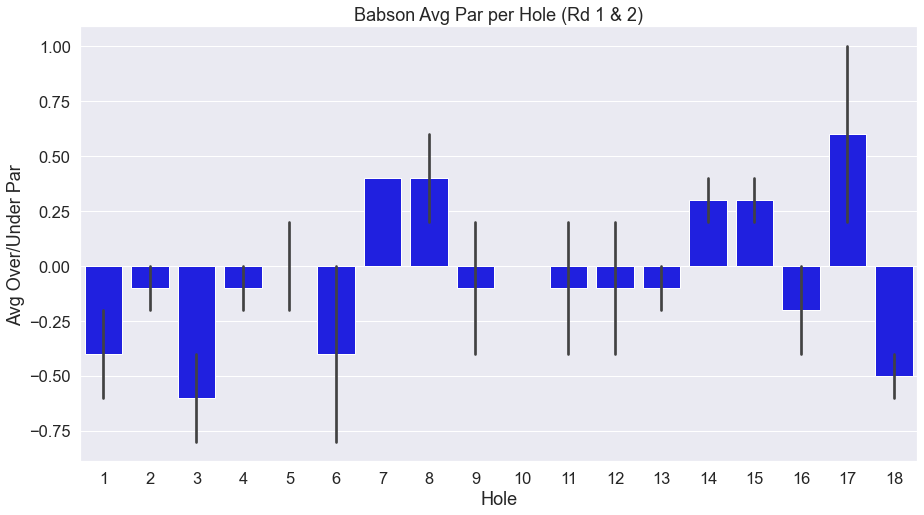

In [65]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['hole'] , y=df['diff'], color='blue')
plt.ylabel('Avg Over/Under Par')
plt.xlabel('Hole')
plt.title('Babson Avg Par per Hole (Rd 1 & 2)');
#plt.savefig('../../../../Desktop/golfStats/babsonAvgPar.png')